# Example of the Neural Network

In [ ]:
# Import required TensorFlow and Keras modules
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Define a new CNN model with updated variable names
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split

In [ ]:
# Load MNIST handwritten digits dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, test_images = train_images.reshape(-1, 28, 28, 1) / 255.0, test_images.reshape(-1, 28, 28, 1) / 255.0
train_images, test_images = train_images.astype("float32"), test_images.astype("float32")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Convert class vectors to one-hot encoded format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Display dataset shapes and sample counts
print("Training data shape:", train_images.shape)
print("Number of training samples:", train_images.shape[0])
print("Number of test samples:", test_images.shape[0])

Training data shape: (60000, 28, 28, 1)
Number of training samples: 60000
Number of test samples: 10000


In [ ]:
# Initialize the model
cnn_model = Sequential()

# First convolutional block
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

# Second convolutional block
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

# Dense (fully connected) layers
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))  # Output layer for classification


cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=
               ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Split data into training and validation sets (no augmentation)
x_train_simple, x_val_simple, y_train_simple, y_val_simple = train_test_split(
    train_images, train_labels, test_size=0.1
)

# Train the model directly on the unaugmented data
history = cnn_model.fit(
    x_train_simple,
    y_train_simple,
    epochs= 7,
    batch_size= 64,
    validation_data=(x_val_simple, y_val_simple)
)


Epoch 1/7
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7995 - loss: 0.6067 - val_accuracy: 0.9800 - val_loss: 0.0697
Epoch 2/7
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9650 - loss: 0.1122 - val_accuracy: 0.9852 - val_loss: 0.0478
Epoch 3/7
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9744 - loss: 0.0835 - val_accuracy: 0.9865 - val_loss: 0.0424
Epoch 4/7
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9786 - loss: 0.0687 - val_accuracy: 0.9868 - val_loss: 0.0420
Epoch 5/7
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9824 - loss: 0.0575 - val_accuracy: 0.9888 - val_loss: 0.0352
Epoch 6/7
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9840 - loss: 0.0529 - val_accuracy: 0.9892 - val_loss: 0.0333
Epoch 7/7
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9842 - loss: 0.0524 - val_accuracy: 0.9905 - val_loss: 0.0310


In [ ]:
loss, acc = cnn_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9885 - loss: 0.0310


In [ ]:
acc

0.991599977016449

The first step in this code requires loading the necessary libraries, including TensorFlow, Keras, and MNIST dataset and any required utility functions. The code obtains the MNIST dataset, changes image shapes to be in line with the formatting to be expected of the CNN and normalizes the pixel intensities to be within 0 and 1. Float 32 type is used to convert data to improve overall training efficiency.

A Convolutional Neural Network (CNN) model is developed, with two convolutional layers, and a max pooling and dropout layer appended thereon to avoid overfitting. Flattened the data the model is made up of two dense layers – while the last layer uses softmax activation to classify the digits into one of ten classes.

The accuracy of the compiled model is tested with categorical cross-entropy loss, with the Adam optimizer. The dataset is split into a training and validation subset, and the model fitted in 7 epochs without data augmentation. Training continues along the fit method with validation data constantly being monitored to measure when each epoch is complete and how far the process has progressed. On account of this fact, the model is trained using the MNIST dataset with validation and only original image data is used for training.

# Test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


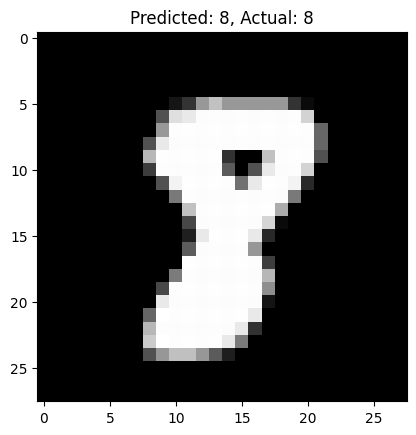

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random image from the test dataset
image_index = np.random.randint(0, len(test_images))
selected_image = test_images[image_index]
selected_label = test_labels[image_index]

# Reshape the image for the model (already in correct shape, just need normalization)
image = selected_image.reshape(1, 28, 28, 1).astype("float32") / 255.0

# Predict using the trained CNN model
prediction = cnn_model.predict(image)

# Get the predicted class (digit)
predicted_class = np.argmax(prediction)

# Display the image and the prediction
plt.imshow(selected_image.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted_class}, Actual: {np.argmax(selected_label)}")
plt.show()


Perfectly Works